# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### Описание данных
* `airports_nearest`— расстояние до ближайшего аэропорта в метрах (м)  
* `balcony` — число балконов  
* `ceiling_height` — высота потолков (м)  
* `cityCenters_nearest` — расстояние до центра города (м)  
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
* `first_day_exposition` — дата публикации  
* `floor` — этаж  
* `floors_total` — всего этажей в доме  
* `is_apartment` — апартаменты (булев тип)  
* `kitchen_area` — площадь кухни в квадратных метрах (м²)  
* `last_price` — цена на момент снятия с публикации  
* `living_area` — жилая площадь в квадратных метрах(м²)  
* `locality_name` — название населённого пункта  
* `open_plan` — свободная планировка (булев тип)  
* `parks_around3000` — число парков в радиусе 3 км  
* `parks_nearest` — расстояние до ближайшего парка (м)  
* `ponds_around3000` — число водоёмов в радиусе 3 км  
* `ponds_nearest` — расстояние до ближайшего водоёма (м)  
* `rooms` — число комнат  
* `studio` — квартира-студия (булев тип)  
* `total_area` — площадь квартиры в квадратных метрах (м²)  
* `total_images` — число фотографий квартиры в объявлении  

### Оглавление
1. #### <a href='#gen_info'>Изучение общей информации</a>
2. #### <a href='#preprocessing'>Предобработка данных</a>
3. #### <a href='#feature_eng'>Добавление новых данных</a>
4. #### <a href='#research'>Исследовательский анализ</a>
5. #### <a href='#conclusion'>Общий вывод</a>

### Шаг 1. Откройте файл с данными и изучите общую информацию.   
<a id = 'gen_info'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

#### Вывод
<a id = 'gen_info_conclusion'></a>

В данных много пропусков, необходимо определить, чем это может быть вызвано и какие из них можно заполнить, провести предобработку.

### Шаг 2. Предобработка данных
<a id = 'preprocessing'></a>

В колонке `is_apartment` заполнено около 8% значений, в целом апартаментов меньше чем квартир. Это булева переменная и скорее всего не заполненое поле означает тип жилье (False - не апартаменты). Заменим NaN на False.  
Тот же вывод делаем в отношении стобца `studio`  

In [5]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['studio'] = data['studio'].fillna(False)

В отношении числа балконов можем сделать вывод: незаполненное поле - балконов нет. Число баконов может быть локо целое. Заметим тип данных на `int`  
То же сделаем с переменными "число парков в 3 км", "число водоемов в 3 км"

In [6]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

мы не можем однозначно установить по данным число этажей в доме, оставим проспуски в этом столбце, приведя значения к int

In [7]:
data['floors_total'] = data['floors_total'].astype('Int64')

цену жилья измеряется сотнями тысяч рулей, можем привести столбец к `int`

In [8]:
data['last_price'] = data['last_price'].astype(int)

незаполненные столбцы расстояний до аэроптортов, парков, водоемов, предроложительно означают дальность от этих объектов. Оставим в этих столбцах пропущенные значения, чтобы не искажать распределение. Приведем остальные данные к `int`

In [9]:
data['airports_nearest'] = data['airports_nearest'].astype('Int64')
data['parks_nearest'] = data['parks_nearest'].astype('Int64')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('Int64')
data['ponds_nearest'] = data['ponds_nearest'].astype('Int64')

In [10]:
len(data.query('days_exposition==0'))

0

столбец `days_exposition` имеет пропуски. Эта переменная подразумевает автоматический счет. Похоже на техническую ошибку.  
Предполагаем, что объявление было удалено до подсчета (в день, когда было выложено). Значения с 0 в `days_exposition` отсутствуют.  
Заменим NaN на 0 и приведем переменную к типу int

In [11]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype(int)

In [12]:
data['locality_name'] = data['locality_name'].str.lower()

Столбец с датой публикации приведем к типу date для удобства работы с ним

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [14]:
data.duplicated().sum()

0

данные не имеют дубликатов, проверим на дубликаты без учета даты и столбца `days_exposition`

In [15]:
data[data.drop(['days_exposition', 'first_day_exposition'], axis = 1).duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9886,1,2533531,42.5,2016-11-25,1,2.56,18,19.8,7,False,...,NaN,0,никольское,NaN,NaN,0,NaN,0,NaN,549


In [16]:
data = data[data.index!=9886].reset_index(drop= True)

Действительно, один дубликат есть, объвление об одной квартире было выложено в разные даты


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23698 entries, 0 to 23697
Data columns (total 22 columns):
total_images            23698 non-null int64
last_price              23698 non-null int64
total_area              23698 non-null float64
first_day_exposition    23698 non-null datetime64[ns]
rooms                   23698 non-null int64
ceiling_height          14503 non-null float64
floors_total            23612 non-null Int64
living_area             21795 non-null float64
floor                   23698 non-null int64
is_apartment            23698 non-null bool
studio                  23698 non-null bool
open_plan               23698 non-null bool
kitchen_area            21421 non-null float64
balcony                 23698 non-null int64
locality_name           23649 non-null object
airports_nearest        18157 non-null Int64
cityCenters_nearest     18180 non-null Int64
parks_around3000        23698 non-null int64
parks_nearest           8079 non-null Int64
ponds_around3000      

#### Вывод

В данных много пропусков, мы заменили те, значения которым эмпирически можем дать по данным.  
Столбцы близости водоемов и парков имеют малое число заполненых значений, пропуски в них оставили, чтобы не искажать распределние.  
Из данных видно, что жилье делится на типы: апартаменты, квартиры, комнаты. Тип жилья можно добавить отдельным вопросом и переменной  в данные.

### Шаг 3. Посчитайте и добавьте в таблицу
<a id = 'feature_eng'></a>

In [18]:
data['meter_price'] = (data['last_price'] / data['total_area']).astype(int)

In [19]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [20]:
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [21]:
data['type_floor'] = data.apply(type_floor, axis = 1)

In [22]:
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']

In [23]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition,type_floor,living_area_part,kitchen_area_part
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0,NaN,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,2,574,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,3,234,424,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0,NaN,55,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0,NaN,155,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,0,NaN,0,110544,3,4,2019,другой,NaN,0.263966
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,0,NaN,189,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,289,88524,6,2,2017,другой,0.714754,0.106557


#### Вывод

Посчитали и добавиил в таблицу:  
    1. цену квадратного метра
    2. день недели, месяц, год публикации
    3. тип этажа
    4. соотношение жилой площади к общей и площади кухни к общей площади  
Наши данные стали полнее и удобнее для исследования.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:  
<a id = 'research'></a>

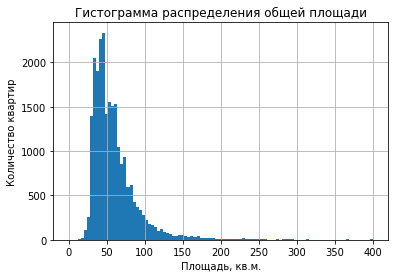

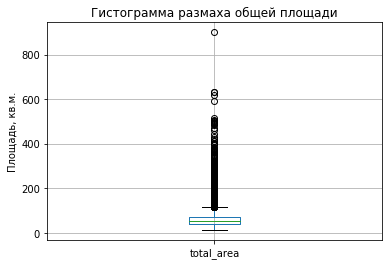

In [24]:
data['total_area'].hist(bins = 100, range = (0,400))
plt.title('Гистограмма распределения общей площади')
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Количество квартир')
plt.show()
data.boxplot(column='total_area')
plt.title('Гистограмма размаха общей площади')
plt.ylabel('Площадь, кв.м.')
plt.show()

У нас много больших значений, выше 3-го квартиля. Квартиры в центре стоят сильно дороже среднего, удалим строки с аномальными значениями, большими 500

In [25]:
data_pure = data.query('total_area<500')

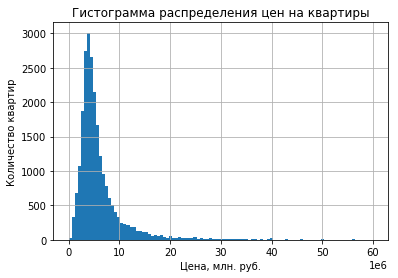

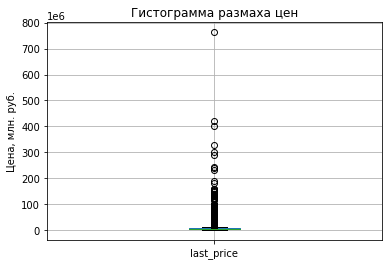

In [26]:
data['last_price'].hist(bins = 100, range = (0, 0.6*10**8))
plt.title('Гистограмма распределения цен на квартиры')
plt.xlabel('Цена, млн. руб.')
plt.ylabel('Количество квартир')
plt.ticklabel_format(axis='x', scilimits=(6, 6))
plt.show()
data.boxplot(column='last_price')
plt.title('Гистограмма размаха цен')
plt.ylabel('Цена, млн. руб.')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.show()

In [27]:
data['last_price'].describe().round()

count        23698.0
mean       6541718.0
std       10887212.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

In [28]:
data_pure = data_pure.query('(last_price<1.5*10**8) & (last_price>4*10**5)')

Цены на квартиры в центре могут быть значительно выше остальных, по гистограмме размаха видим большое число цен, выходящих за диапазон 3 квартиля. Принято решение исключить значительно выбивающиеся значения. Значений больше 150*10^6 сильно меньше.

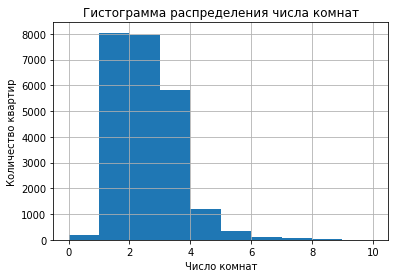

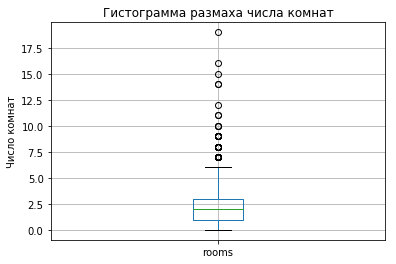

In [29]:
data['rooms'].hist(bins = 10, range = (0, 10))
plt.title('Гистограмма распределения числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()
data.boxplot(column='rooms')
plt.title('Гистограмма размаха числа комнат')
plt.ylabel('Число комнат')
plt.show()

Выбросов в виде числа комнат больших 7 не много, удалим их

Большинство квартир с 0 комнат это студии, возможно, люди неправильно это указали. Можно изменить значение на 1 комнату, если квартира является студией.

In [30]:
data_pure[(data_pure['rooms']==0) & (data_pure['studio']==True)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition,type_floor,living_area_part,kitchen_area_part
144,1,2450000,27.00,2017-03-30,0,NaN,24,15.50,2,False,...,0,NaN,181,90740,3,3,2017,другой,0.574074,NaN
440,8,2480000,27.11,2018-03-12,0,NaN,17,24.75,4,False,...,2,982,64,91479,0,3,2018,другой,0.912947,NaN
608,2,1850000,25.00,2019-02-20,0,NaN,10,NaN,7,False,...,0,NaN,29,74000,2,2,2019,другой,NaN,NaN
697,12,2500000,24.10,2017-12-01,0,2.75,25,17.50,21,False,...,0,NaN,201,103734,4,12,2017,другой,0.726141,NaN
716,5,1500000,17.00,2017-06-07,0,2.70,9,12.00,1,False,...,0,NaN,40,88235,2,6,2017,первый,0.705882,NaN


In [31]:
data_pure['rooms'] = data_pure['rooms'].where((data_pure['rooms']!=0) & (data_pure['studio']==False), 1)

Квартиры студии имеют одну комнату. Число комнат у объявлений с типом квартрой студия и числом комнат 0 заменены на 1.

In [32]:
data_pure = data_pure.query('rooms<7')

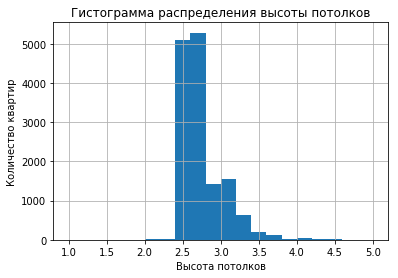

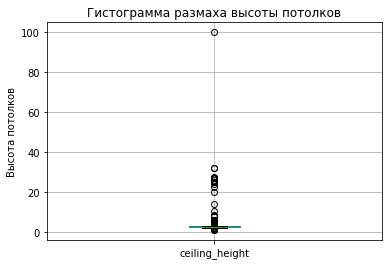

In [33]:
data['ceiling_height'].hist(bins = 20, range = (1,5))
plt.title('Гистограмма распределения высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()
data.boxplot(column ='ceiling_height')
plt.title('Гистограмма размаха высоты потолков')
plt.ylabel('Высота потолков')
plt.show()

Не будем отбрасывать строки по параметру `ceiling_height`, чтобы не удалились строки со значением `NaN`, потому что таких строк много и остальные значения в этих строках будут полезны для дальнейшего анализа

In [34]:
len(data_pure)/len(data)

0.9956114440037134

Мы убрали редкие значения, что не сильно уменьшило наш датасет. Теперь в нем не так много выбивающихся значений, это полезно для анализа.

Столбец с высотой потолков содержит "плохие" значения, такие как 1 и 2 м (что меньше высоты по СНиП в 2,5 метра), и 100 метров. Также там есть диапазон значений от 25 до 32 (примерно) метров, в которых, скорей всего, пропущена десятичная точка/запятая.

In [35]:
data_pure['ceiling_height'] = data_pure['ceiling_height'].fillna(-99)
data_pure = data_pure.query('((ceiling_height>2.5) & (ceiling_height<=35)) | (ceiling_height==-99)')

In [36]:
def height_norm(row):
    if row['ceiling_height']>=25:
        return row['ceiling_height']/10
    elif row['ceiling_height']==-99:
        pass
    else:
        return row['ceiling_height']

In [37]:
data_pure['ceiling_height'] = data_pure.apply(height_norm,axis  =1)

In [38]:
data_pure.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition,type_floor,living_area_part,kitchen_area_part
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0,NaN,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2,574,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,3,234,424,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121,100000,1,6,2018,другой,0.320000,0.410000


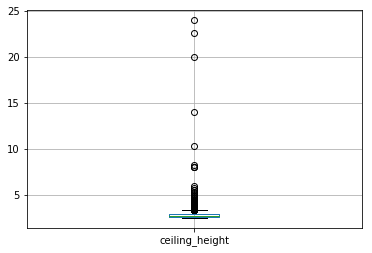

In [39]:
data_pure.boxplot(column ='ceiling_height')

Мы почистили данные, убрав строки со значениями высоты потолков меньше 2.5 метров и привели неверно заполненные значения(с пропущенной десятичной точкой) к верному виду.

Text(0, 0.5, 'Количество квартир')

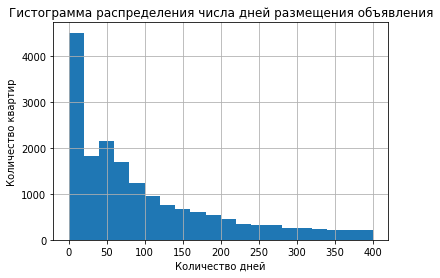

In [40]:
data_pure['days_exposition'].hist(bins = 20, range = (0,400))
plt.title('Гистограмма распределения числа дней размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')

In [41]:
data_pure['days_exposition'].describe()

count    20006.000000
mean       160.166300
std        215.901042
min          0.000000
25%         25.000000
50%         76.000000
75%        203.000000
max       1572.000000
Name: days_exposition, dtype: float64

По гистограмме и характеристиках распределения видим, что половина жилья продается за 76 дней, это можно считать нормой. В то же время продажа менее чем за 25 дня необычно быстрая, более чем за 203 необычно долгая.

Исследуем влияние факторов на стоимость квартиры. 

Text(0, 0.5, 'Цена млн.руб.')

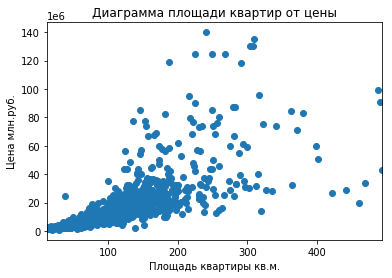

In [42]:
data_pure.groupby('total_area')['last_price'].mean().plot(style = 'o')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.title('Диаграмма площади квартир от цены')
plt.xlabel('Площадь квартиры кв.м.')
plt.ylabel('Цена млн.руб.')

Text(0, 0.5, 'Цена млн.руб.')

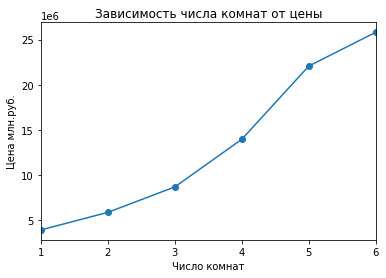

In [43]:
data_pure.groupby('rooms')['last_price'].mean().plot(style = 'o-')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.title('Зависимость числа комнат от цены')
plt.xlabel('Число комнат')
plt.ylabel('Цена млн.руб.')

Text(0, 0.5, 'Цена млн.руб.')

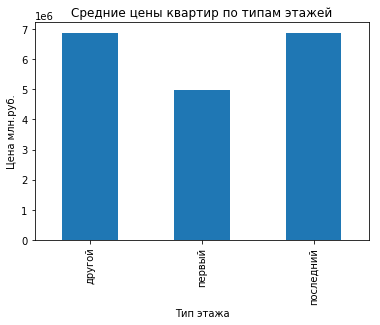

In [44]:
data_pure.groupby('type_floor')['last_price'].mean().plot(kind = 'bar')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.title('Средние цены квартир по типам этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Цена млн.руб.')

Text(0, 0.5, 'Цена млн.руб.')

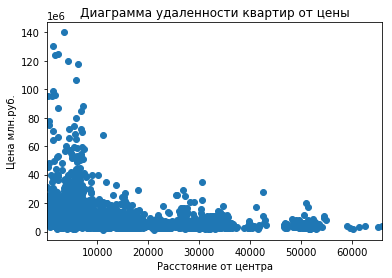

In [45]:
data_pure.groupby('cityCenters_nearest')['last_price'].mean().plot(style = 'o')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.title('Диаграмма удаленности квартир от цены')
plt.xlabel('Расстояние от центра')
plt.ylabel('Цена млн.руб.')

In [46]:
data_pure.corr()['last_price'].sort_values(ascending = False)

last_price             1.000000
meter_price            0.749994
total_area             0.736570
living_area            0.651200
kitchen_area           0.562364
rooms                  0.440098
parks_around3000       0.274093
ponds_around3000       0.263980
ceiling_height         0.256380
total_images           0.136522
days_exposition        0.077971
is_apartment           0.031486
living_area_part       0.019489
floor                  0.009005
balcony                0.006054
month_exposition       0.001179
weekday_exposition     0.000608
open_plan             -0.014331
parks_nearest         -0.020601
airports_nearest      -0.026013
floors_total          -0.030212
studio                -0.040961
year_exposition       -0.049811
kitchen_area_part     -0.111655
ponds_nearest         -0.112659
cityCenters_nearest   -0.280154
Name: last_price, dtype: float64

Больше всего на стоимость квартиры влияет ее площадь, жилая площадь, площадь кухни.
Цена зависит от числа квадратных метров, есть зависимость от числа комнат, это обусловлено прямой зависимостью между числом комнат и метров жилья.  
Средняя цена квартир на первом этаже ниже, чем на более высоких этажах.  
Удаленность от центра влияет на цену, квартиры в центре дороже.


Изучим зависимость от даты размещения: дня недели, месяца и года.

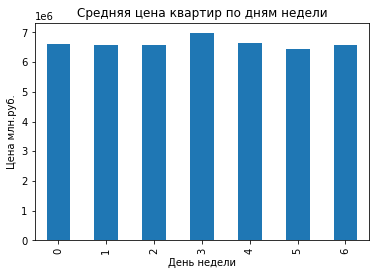

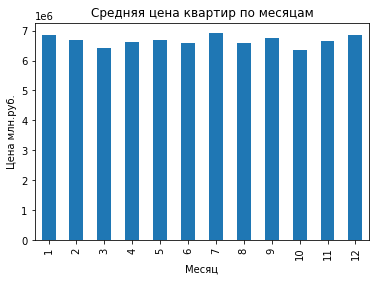

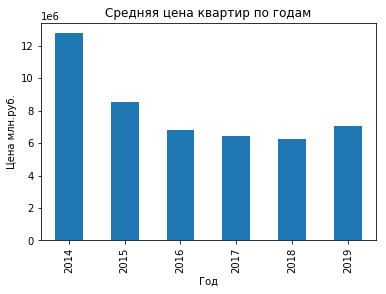

In [47]:
data_pure.groupby('weekday_exposition')['last_price'].mean().plot(kind = 'bar')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.title('Средняя цена квартир по дням недели')
plt.xlabel('День недели')
plt.ylabel('Цена млн.руб.')
plt.show()
data_pure.groupby('month_exposition')['last_price'].mean().plot(kind = 'bar')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.title('Средняя цена квартир по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Цена млн.руб.')
plt.show()
data_pure.groupby('year_exposition')['last_price'].mean().plot(kind = 'bar')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.title('Средняя цена квартир по годам')
plt.xlabel('Год')
plt.ylabel('Цена млн.руб.')
plt.show()

Средняя цена каждый день и месяц остается той же. По гистограмме видно, что цены были максимальными в 2014 году, до 2018 она падала, а в 2019 был небольшой рост

Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
top_ads = data_pure.groupby('locality_name')['meter_price'].agg({'meter_price': ['count', 'mean']})
top_ads_sort = top_ads.sort_values(by = ('meter_price', 'count'), ascending = False)
top_ads_sort.head(10)

meter_price               
                        count           mean
locality_name                               
санкт-петербург         13486  116177.368679
посёлок мурино            514   85669.344358
посёлок шушары            411   78653.892944
всеволожск                366   69144.620219
посёлок парголово         311   90272.543408
деревня кудрово           298   92454.889262
пушкин                    289  104972.325260
гатчина                   236   68972.652542
колпино                   233   75222.038627
выборг                    196   58573.918367

Наибольшая стоимость жилья в Санкт-Петербурге, посёлке мурино, посёлке шушары.  
Наименьшая стоимость в Выборге, Колпино.

Исследуем зависимость цены от удаленности центра

In [50]:
data_spb = data_pure.query('locality_name=="санкт-петербург"')
data_spb['centerNearest_km'] = (data_spb['cityCenters_nearest']/1000).round().astype('Int64')

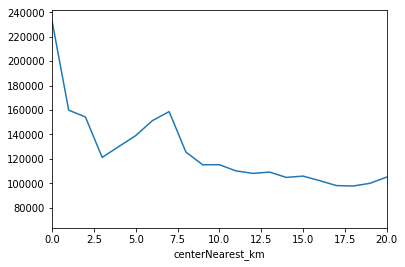

In [51]:
data_spb.groupby('centerNearest_km')['meter_price'].mean().plot(xlim = (0,20))

У нас есть скачок в районе 2.5 километра, но плавное снижение цены начинается с 7 км, это похоже на место окончания центра города.

In [52]:
data_spb_centre = data_spb.query('centerNearest_km<=7')

In [53]:
def research(df1,df2):

    df1['days_exposition'].hist(bins = 20, range = (0,400))
    df2['days_exposition'].hist(bins = 20, range = (0,400))
    plt.title('Гистограмма распределения числа дней размещения объявления')
    plt.xlabel('Количество дней')
    plt.ylabel('Количество квартир')
    plt.legend(['spb', 'spb_centre'])
    plt.show()

    df1.groupby('total_area')['last_price'].mean().plot(style = 'o')
    df2.groupby('total_area')['last_price'].mean().plot(style = 'o')
    plt.ticklabel_format(axis='y', scilimits=(6, 6))
    plt.title('Зависимости площади квартир от цены')
    plt.xlabel('Площадь квартиры кв.м.')
    plt.ylabel('Цена млн.руб.')
    plt.legend(['spb', 'spb_centre'])
    plt.show()

    df1.groupby('rooms')['last_price'].mean().plot(style = 'o-')
    df2.groupby('rooms')['last_price'].mean().plot(style = 'o-')
    plt.ticklabel_format(axis='y', scilimits=(6, 6))
    plt.title('Зависимость числа комнат от цены')
    plt.xlabel('Число комнат')
    plt.ylabel('Цена млн.руб.')
    plt.legend(['spb', 'spb_centre'])
    plt.show()
    
    df1.groupby('type_floor')['last_price'].mean().plot(kind = 'bar')
    df2.groupby('type_floor')['last_price'].mean().plot(kind = 'bar')
    plt.ticklabel_format(axis='y', scilimits=(6, 6))
    plt.title('Средние цены квартир по типам этажей')
    plt.xlabel('Тип этажа')
    plt.ylabel('Цена млн.руб.')
    plt.show()

In [54]:
data_spb['days_exposition'].describe()

count    13486.000000
mean       164.019131
std        222.597513
min          0.000000
25%         23.000000
50%         78.000000
75%        208.000000
max       1572.000000
Name: days_exposition, dtype: float64

In [55]:
data_spb_centre['days_exposition'].describe()

count    3331.000000
mean      208.579706
std       267.089373
min         0.000000
25%        21.000000
50%        99.000000
75%       293.000000
max      1572.000000
Name: days_exposition, dtype: float64

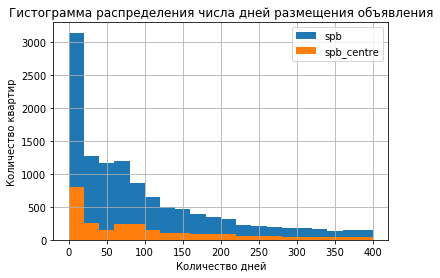

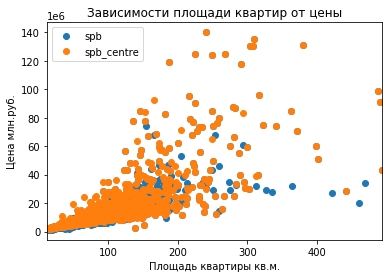

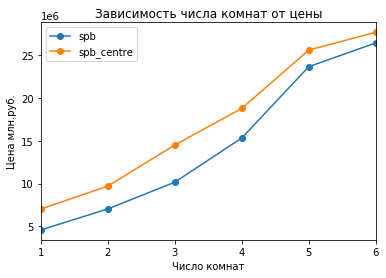

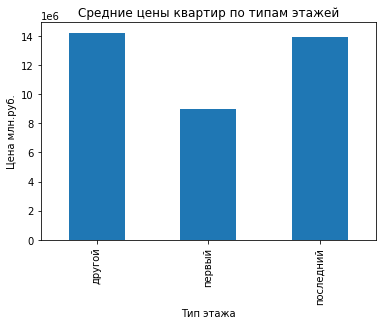

In [56]:
research(data_spb, data_spb_centre)

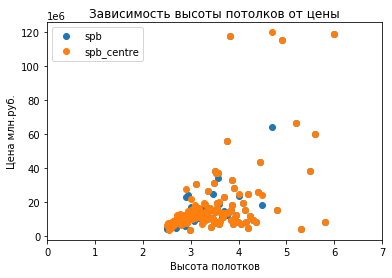

In [57]:
data_spb.groupby('ceiling_height')['last_price'].mean().plot(xlim = (0,7), style = 'o')
data_spb_centre.groupby('ceiling_height')['last_price'].mean().plot(xlim = (0,7), style = 'o')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.title('Зависимость высоты потолков от цены')
plt.xlabel('Высота полотков')
plt.ylabel('Цена млн.руб.')
plt.legend(['spb', 'spb_centre'])
plt.show()

In [58]:
data_spb_centre.corr()['last_price'].sort_values(ascending = False)

last_price             1.000000
meter_price            0.762930
total_area             0.701665
living_area            0.603535
kitchen_area           0.522764
rooms                  0.366449
ceiling_height         0.247130
parks_around3000       0.167818
total_images           0.156228
airports_nearest       0.137452
floor                  0.121058
ponds_around3000       0.107459
balcony                0.073317
days_exposition        0.064073
floors_total           0.061171
is_apartment           0.052535
weekday_exposition     0.041960
open_plan              0.023514
centerNearest_km      -0.007015
month_exposition      -0.011433
cityCenters_nearest   -0.011689
living_area_part      -0.022666
studio                -0.036147
parks_nearest         -0.068363
kitchen_area_part     -0.071205
year_exposition       -0.075307
ponds_nearest         -0.105759
Name: last_price, dtype: float64

Мы выделили сегмент квартир в центре.  
Часть квартир в цеттре(25%) продается немного быстрее, чем то же число во всем городе. Большая часть квартир в центре продаются дольше, чем квартиры в целом в Санкт-Петербурге(97 против 78 дней). Цена квартиры в пересчете на число комнат выше в центре, но зависимость цен от числа комнат та же, что и во всем городе.
Цена зависит от числа квадратных метров, есть зависимость от числа комнат, средняя цена квартир на первом этаже ниже, чем на более высоких этажах.  
Цена квадратного метра зависит от близости к центру. Нет зависимости цены от высоты потолков.  
Можем сделать вывод, что на цену квартиры в центре влияют те же факторы, что и жилья в общем: площадь, цена кв метра, жилая площадь.

### Шаг 5. Общий вывод
<a id = 'conclusion'></a>

Мы исследовали объявления о продаже квартир в Санкт-Петербурге и соседних населенных пунктах по данным сервиса Яндекс.Недвижимость.  

Изучив данные, было обнаружено множество пропусков. Мы предобработали данные, заполнив пропуски, значения на месте которых можем эмпирически найти. Так мы выявили, что пользователи, продающие квартиры без балконов оставляют сответствующее поле пустым. Пользователи, продающие не апартаменты оставляют поле (тип апартаменты) не заполненным. Поле числа парков и водоемов в 3 км при их остутствии не заполняется – техническая ошибка. Столбцы близости водоемов и парков имеют малое число заполненых значений, пропуски в них оставили, чтобы не искажать распределние.

В данных был обнаружен дубликат. Объявление о продаже квартиры выложено в разные дни.
В таблицу были добавлены новые данные для анализа. Мы добавили: цену квадратного метра, день недели, месяц, год публикации, тип этажа, соотношение жилой площади к общей и площади кухни к общей площади.
Мы провели исследовательский анализ и избавились от явных выбросов. Среди выбросов мы увидели цены на квартиры сильно ниже средних (12000), высоту потолков ниже допустимых значений. Было выяснено, что пользователи ошибаются в метраже квартиры, указывая значения без десятичной точки.

Оказалось, что двухкомнатных продается почти столько же сколько и однокомнатных, квартир с другим числом комнат сильно меньше. По гистограмме и характеристиках распределения выяснили, что половина жилья продается за 76 дня, это можно считать нормой. В то же время продажа менее чем за 25 дня необычно быстрая, более чем за 203 необычно долгая.

Мы исследовали влияние факторов на стоимость квартир и сделали выводы.
Больше всего на стоимость квартиры влияет ее площадь, жилая площадь, площадь кухни. Цена зависит от числа квадратных метров, есть зависимость от числа комнат, это обусловлено прямой зависимостью между числом комнат и метров жилья.
Средняя цена квартир на первом этаже ниже, чем на более высоких этажах.
Удаленность от центра влияет на цену, квартиры в центре дороже.
 
Средняя цена на квартиры во все месяцы и во все дни недели. Цена продажи не зависит от сезонности. Выяснили, цены были максимальными в 2014 году, до 2018 цена падала, а в 2019 был небольшой рост. Наибольшая стоимость квадратного метражилья в Санкт-Петербурге(116177 руб), поселке Мурино(85669 руб ). Наименьшая стоимость в Выборге(58573 руб ), Колпино(75222 руб ).

Исследовали зависимость цены от удаленности центра. По средней цене на каждом километре определили центральную зону – 7 км.  
Часть квартир в цетре(25%) продается немного быстрее, чем то же число во всем городе. Большая часть квартир в центре продаются дольше, чем квартиры в целом в Санкт-Петербурге(97 против 78 дней). Цена квартиры в пересчете на число комнат выше в центре, но зависимость цен от числа комнат та же, что и во всем городе. Цена зависит от числа квадратных метров, есть зависимость от числа комнат, средняя цена квартир на первом этаже ниже, чем на более высоких этажах.
Цена квадратного метра зависит от близости к центру. Нет зависимости цены от высоты потолков.
Можем сделать вывод, что на цену квартиры в центре влияют те же факторы, что и жилья в общем: площадь, жилая площадь.
